# Polynomial Regression

Add powers of each feature as a new feature and train as linear model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Test Data

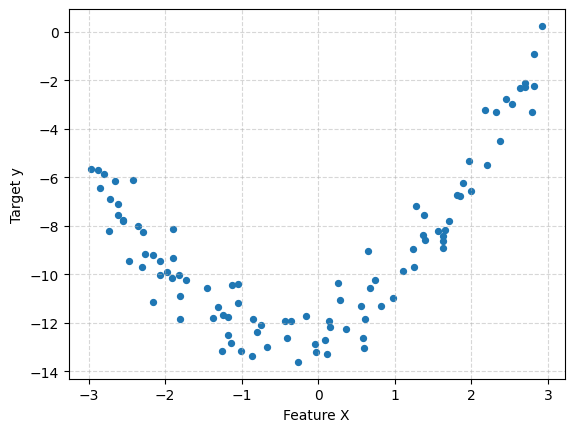

In [13]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 1 * X**2 + X - 12 + np.random.randn(m, 1)

# Plotting the data
plt.scatter(X, y, s=18)  # slightly smaller points
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Add Power Features

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

## Regression

Intercept (real is -12): [-12.21865419]
Coefficients (real is [1, 1]): [[0.93366893 1.06456263]]


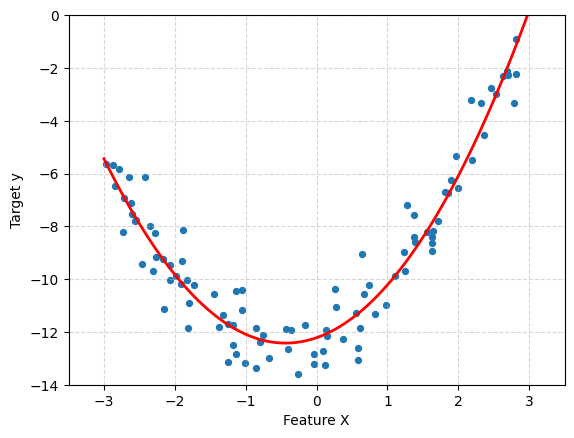

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Print model parameters
print("Intercept (real is -12):", lin_reg.intercept_)
print("Coefficients (real is [1, 1]):", lin_reg.coef_)

# Plot predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.scatter(X, y, s=18)
plt.plot(X_new, y_new, color='r', linewidth=2)
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.grid(True, linestyle='--', alpha=0.5)

# set limits for better visualization
plt.xlim(-3.5, 3.5)
plt.ylim(-14, 0)

plt.show()

## Learning Curves

Plot of training error and validation error against training iteration 

### Underfitting Model

/Users/boris.tsarev/MyProjects/ai-explore/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:2160: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 80.
  warnings.warn(


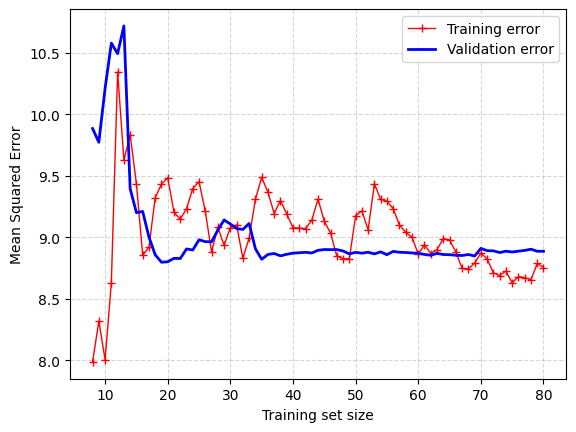

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1.0, 80), cv=5, scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=1, label="Training error")
plt.plot(train_sizes, val_errors, "b-", linewidth=2, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Overfitting Model

/Users/boris.tsarev/MyProjects/ai-explore/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:2160: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 80.
  warnings.warn(


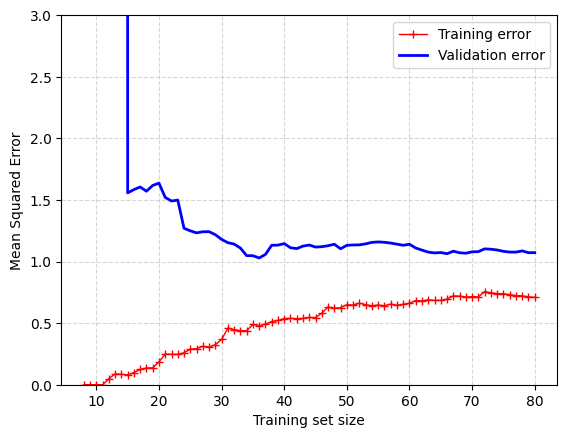

In [45]:
from sklearn.pipeline import make_pipeline

polynomial_pipeline = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())
train_sizes, train_scores, val_scores = learning_curve(polynomial_pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 80), cv=5, scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=1, label="Training error")
plt.plot(train_sizes, val_errors, "b-", linewidth=2, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 3)
plt.show()

### Good Fitting Model

/Users/boris.tsarev/MyProjects/ai-explore/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:2160: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 80.
  warnings.warn(


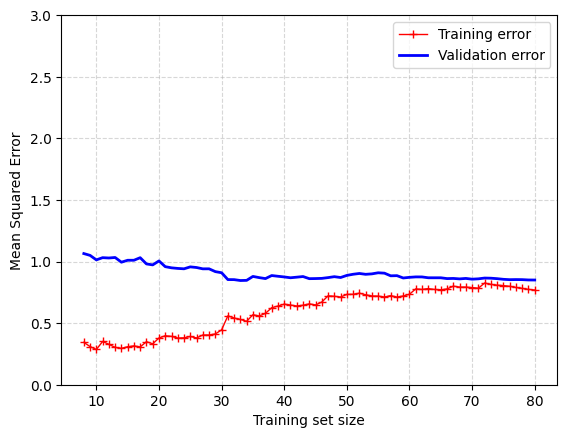

In [52]:
square_pipeline = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
train_sizes, train_scores, val_scores = learning_curve(square_pipeline, X, y, train_sizes=np.linspace(0.1, 1.0, 80), cv=5, scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=1, label="Training error")
plt.plot(train_sizes, val_errors, "b-", linewidth=2, label="Validation error")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")   
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(0, 3)
plt.show()

## Bias/Variance Trade-Off

- **Bias** - wrong assumprions, high-bias leads to underfitting
- **Variance** - model's excessive sensitivity, high variance leads to overfitting
- **Irreducible error** - noisinesss of the data 